In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [154]:
data = pd.read_csv("D:\project_ML\Disease Prediction/framingham.csv")
df = pd.DataFrame(data)
df

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Sorena Pardaz\AppData\Local\Temp\ipykernel_10856\3519125952.py:1: SyntaxWarning: invalid escape sequence '\p'
  data = pd.read_csv("D:\project_ML\Disease Prediction/framingham.csv")


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [156]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [157]:
data.fillna(data.mean(), inplace=True)

In [158]:
df.sample(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
12,1,46,1.0,1,15.0,0.0,0,1,0,294.0,142.0,94.0,26.31,98.0,64.000000,0
1577,0,51,1.0,0,0.0,0.0,0,0,0,226.0,130.0,80.0,23.24,60.0,63.000000,0
1759,1,57,1.0,1,9.0,0.0,0,1,0,274.0,173.0,102.0,27.26,69.0,75.000000,0
1194,0,62,1.0,0,0.0,0.0,0,1,0,231.0,184.0,90.0,26.03,70.0,75.000000,0
626,1,38,1.0,1,10.0,0.0,0,0,0,219.0,115.0,71.0,24.58,65.0,93.000000,0
1949,0,46,1.0,0,0.0,0.0,0,0,0,295.0,145.0,90.0,25.87,90.0,79.000000,0
2489,1,44,4.0,0,0.0,0.0,0,0,0,201.0,120.0,81.0,26.49,70.0,78.000000,0
215,1,45,1.0,1,43.0,0.0,0,1,0,191.0,139.5,75.0,22.30,77.0,81.963655,0
2078,0,40,4.0,1,20.0,0.0,0,0,0,182.0,95.5,64.0,25.21,60.0,72.000000,0
1603,0,61,1.0,1,10.0,0.0,0,0,0,200.0,187.0,95.5,21.57,58.0,64.000000,0


In [159]:
x = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

scaler = MinMaxScaler()
x = scaler.fit(x).fit_transform(x)

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 4)
print('Train set : ',x_train.shape, y_train.shape)
print('Test set : ',x_test.shape, y_test.shape)

Train set :  (3392, 15) (3392,)
Test set :  (848, 15) (848,)


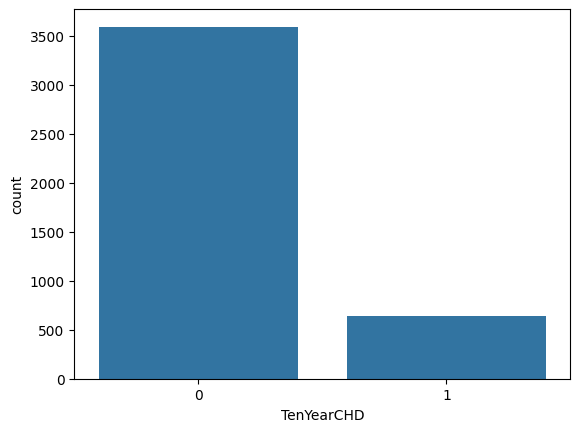

In [161]:
sns.countplot(x='TenYearCHD', data=data)
plt.show()

In [162]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [163]:
y_pred = LR.predict(x_test)

In [164]:
print('accuracy score : ', accuracy_score(y_test, y_pred))

accuracy score :  0.8525943396226415


In [168]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       719
           1       0.83      0.04      0.07       129

    accuracy                           0.85       848
   macro avg       0.84      0.52      0.50       848
weighted avg       0.85      0.85      0.79       848



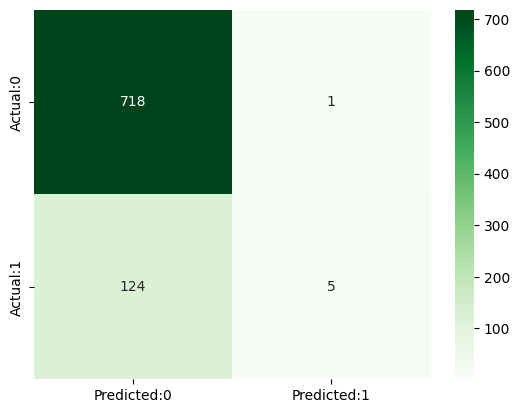

In [ ]:
CM = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = CM, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index = ['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix , annot=True, fmt='d', cmap='Greens')
plt.show()